<a href="https://colab.research.google.com/github/sriramreddy-7/ML/blob/main/Branch_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing required libraries**

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/TSEAMCET_2023.csv')

df.head()

,Inst Code,Institution Name,Branch,Hall Ticket No,Rank,Candidate Name,Gender,Region,Caste_,Seat_Cat
0,JNTH,JNTUH UNIVERSITY COLLEGE OF ENGG SCI AND TECH ...,CSE,2324A01913,306,YARAGANI MAHESH,M,OU,BC_B,OC_GEN_UR
1,MVSR,M V S R ENGINEERING COLLEGE (AUTONOMOUS),CSD,2325C04135,491,DESHAGANI CHENNAKESHAVA,M,OU,BC_B,BC_B_GEN_OU
2,MVSR,M V S R ENGINEERING COLLEGE (AUTONOMOUS),CSI,2325A07188,511,GOPIREDDY GUNAVARDHAN REDDY,M,OU,OC,OC_PHO_GEN_OU
3,CBIT,CHAITANYA BHARATHI INSTITUTE OF TECHNOLOGY,CSE,2321R05046,524,NALAMOTHU TARAK RAM,M,AU,OC,OC_GEN_UR
4,OUCE,O U COLLEGE OF ENGG HYDERABAD,CSE,2321C01088,590,RAVULA JAYANTH KUMAR REDDY,M,OU,OC,OC_GEN_UR


In [3]:
print(df.isna().sum())

Inst Code           0
Institution Name    0
Branch              0
Hall Ticket No      0
Rank                0
Candidate Name      0
Gender              0
Region              0
Caste_              0
Seat_Cat            0
dtype: int64


In [4]:
df.dropna(inplace=True)

# Drop irrelevant columns
df.drop(['Hall Ticket No', 'Candidate Name'], axis=1, inplace=True)

In [5]:
df

,Inst Code,Institution Name,Branch,Rank,Gender,Region,Caste_,Seat_Cat
0,JNTH,JNTUH UNIVERSITY COLLEGE OF ENGG SCI AND TECH ...,CSE,306,M,OU,BC_B,OC_GEN_UR
1,MVSR,M V S R ENGINEERING COLLEGE (AUTONOMOUS),CSD,491,M,OU,BC_B,BC_B_GEN_OU
2,MVSR,M V S R ENGINEERING COLLEGE (AUTONOMOUS),CSI,511,M,OU,OC,OC_PHO_GEN_OU
3,CBIT,CHAITANYA BHARATHI INSTITUTE OF TECHNOLOGY,CSE,524,M,AU,OC,OC_GEN_UR
4,OUCE,O U COLLEGE OF ENGG HYDERABAD,CSE,590,M,OU,OC,OC_GEN_UR
...,...,...,...,...,...,...,...,...
69397,DCET,DECCAN COLLEGE OF ENGINEERING AND TECHNOLOGY,MEC,300144,M,OU,BC_E,MUS_GEN_OU
69398,SCET,SHADHAN COLL OF ENGINEERING AND TECHNOLOGY (AU...,CSD,300146,M,OU,BC_E,MUS_GEN_UR
69399,LRDS,LORDS INSTITUTE OF ENGINEERING AND TECHNOLOGY ...,CS,300147,M,OU,BC_E,MUS_GEN_OU
69400,SCET,SHADHAN COLL OF ENGINEERING AND TECHNOLOGY (AU...,AIM,300149,M,OU,BC_E,MUS_GEN_OU


In [6]:
df['Institution Name']

,Institution Name
0,JNTUH UNIVERSITY COLLEGE OF ENGG SCI AND TECH ...
1,M V S R ENGINEERING COLLEGE (AUTONOMOUS)
2,M V S R ENGINEERING COLLEGE (AUTONOMOUS)
3,CHAITANYA BHARATHI INSTITUTE OF TECHNOLOGY
4,O U COLLEGE OF ENGG HYDERABAD
...,...
69397,DECCAN COLLEGE OF ENGINEERING AND TECHNOLOGY
69398,SHADHAN COLL OF ENGINEERING AND TECHNOLOGY (AU...
69399,LORDS INSTITUTE OF ENGINEERING AND TECHNOLOGY ...
69400,SHADHAN COLL OF ENGINEERING AND TECHNOLOGY (AU...


In [7]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Check the transformed data
df.head()

,Inst Code,Institution Name,Branch,Rank,Gender,Region,Caste_,Seat_Cat
0,68,65,17,306,1,2,1,129
1,121,96,16,491,1,2,1,28
2,121,96,19,511,1,2,5,147
3,24,26,17,524,1,0,5,129
4,129,124,17,590,1,2,5,129


In [8]:
# Separate features and target variable
X = df.drop('Branch', axis=1)
y = df['Branch']

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

### Decision Tree classifier

In [11]:
# Initialize the Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Train the model
clf_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = clf_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

Decision Tree Accuracy: 42.89%


### Random Forest classifier

In [12]:
# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=250, random_state=42)

# Train the model
clf_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = clf_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 47.13%


### KNN classifier

In [13]:
# Initialize the KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
clf_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = clf_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

KNN Accuracy: 38.87%


In [20]:
# For the best-performing model, e.g., Random Forest
# Print classification report and confusion matrix
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.12      0.06      0.08        16
           2       0.23      0.21      0.22       317
           3       0.31      0.26      0.28       190
           4       0.13      0.07      0.09        29
           5       0.60      0.38      0.46         8
           6       0.27      0.18      0.21        17
           7       0.00      0.00      0.00         9
           8       0.45      0.38      0.42        39
           9       0.20      0.12      0.15        24
          10       0.33      0.28      0.30       305
          11       0.31      0.40      0.35        10
          12       0.37      0.33      0.35        40
          13       0.12      0.15      0.13        13
          14       0.19      0.19      0.19        64
          15       0.24      0.19      0.21       381
          16       0.30      0.28      0.29 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


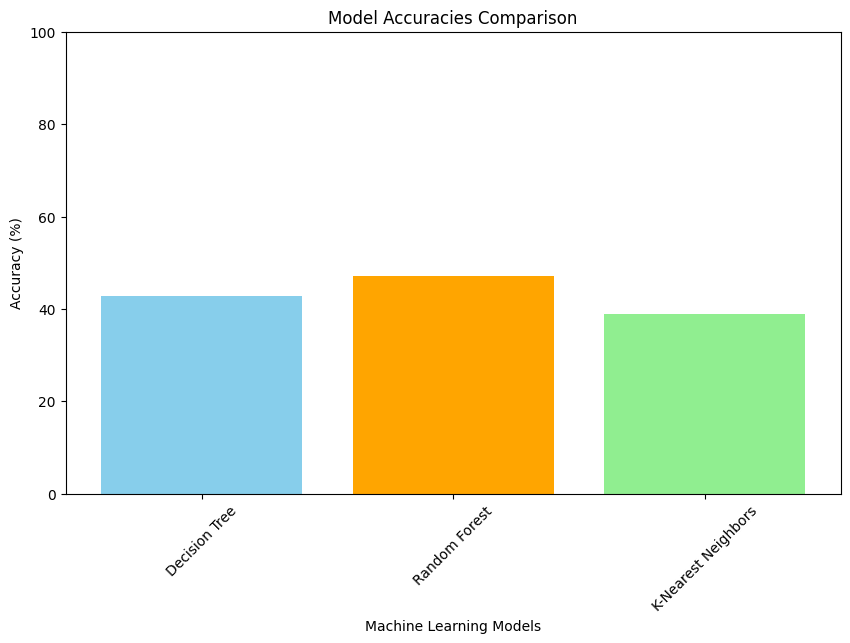

In [27]:
# Assuming you already have these accuracy scores from the models
# Replace with actual calculated accuracies for each model
accuracy_decision_tree = accuracy_score(y_test, y_pred_dt)  # Decision Tree
accuracy_random_forest = accuracy_score(y_test, y_pred_rf)  # Random Forest
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # K-Nearest Neighbors
# accuracy_svc_linear = accuracy_score(y_test, y_pred_svc_linear)  # SVM with linear kernel
# accuracy_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)  # SVM with rbf kernel

# Storing the accuracies in a dictionary for easy plotting
model_accuracies = {
    'Decision Tree': accuracy_decision_tree * 100,
    'Random Forest': accuracy_random_forest * 100,
    'K-Nearest Neighbors': accuracy_knn * 100,
    # 'SVM (Linear Kernel)': accuracy_svc_linear * 100,
    # 'SVM (RBF Kernel)': accuracy_svc_rbf * 100
}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['skyblue', 'orange', 'lightgreen', 'salmon', 'violet'])
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracies Comparison")
plt.ylim(0, 100)  # Setting y-axis limit to 0-100% for readability
plt.xticks(rotation=45)
plt.show()

In [19]:
def predict_branch(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Encode input data using saved encoders
    # Only encode columns present in both input_df and label_encoders
    for col, le in label_encoders.items():
        if col in input_df.columns:  # Check if column exists in input_df
            input_df[col] = le.transform(input_df[col])

    # Scale input data
    input_scaled = scaler.transform(input_df)

    # Predict and decode branch
    branch_encoded = clf_rf.predict(input_scaled)[0]
    branch_name = label_encoders['Branch'].inverse_transform([branch_encoded])[0]

    return branch_name

# Test the prediction function with a sample input
input_data = {'Inst Code': 'JNTH', 'Institution Name': 'JNTUH UNIVERSITY COLLEGE OF ENGG SCI AND TECH HYDERABAD',
              'Rank': 306, 'Gender': 'M', 'Region': 'OU', 'Caste_': 'BC_B', 'Seat_Cat': 'OC_GEN_UR'}

predicted_branch = predict_branch(input_data)
print(f"The predicted branch is: {predicted_branch}")

The predicted branch is: CSE
